### 1. Data Cleaning and Preprocessing

- Workflow:

1. Split your data into train and test sets.
2. Drop, Impute missing values (fit on train, transform test).
3. Select features (fit on train, apply to test).
4. Scale numerical features (fit on train, transform test).
5. Encode categorical features (fit on train, transform test).

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 1.1 Find Missing Values

In [57]:
df = pd.read_csv('data/fraud.csv')
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


#### Note : Some variables contains negative values, this indicate missing data that need to be processed

In [58]:
columns_to_check = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'bank_months_count', 
                    'session_length_in_minutes', 'device_distinct_emails_8w']  

# Convert negative value to nan
df[columns_to_check] = df[columns_to_check].where(df[columns_to_check] >= 0, np.nan)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         287080 non-null   float64
 4   current_address_months_count      995746 non-null   float64
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            257477 non-null   float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

#### 1.1.2 Draw box plot of all missing data

In [60]:
df_missing = df[['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'bank_months_count', 'session_length_in_minutes', 
                 'device_distinct_emails_8w']]
df_missing

,prev_address_months_count,current_address_months_count,intended_balcon_amount,bank_months_count,session_length_in_minutes,device_distinct_emails_8w
0,NaN,25.0,102.453711,9.0,16.224843,1.0
1,NaN,89.0,NaN,2.0,3.363854,1.0
2,9.0,14.0,NaN,30.0,22.730559,1.0
3,11.0,14.0,NaN,1.0,15.215816,1.0
4,NaN,29.0,47.152498,26.0,3.743048,1.0
...,...,...,...,...,...,...
999995,NaN,143.0,NaN,31.0,16.967770,1.0
999996,NaN,193.0,0.008307,NaN,1.504109,1.0
999997,NaN,202.0,50.609995,31.0,16.068595,1.0
999998,52.0,3.0,NaN,1.0,1.378683,1.0


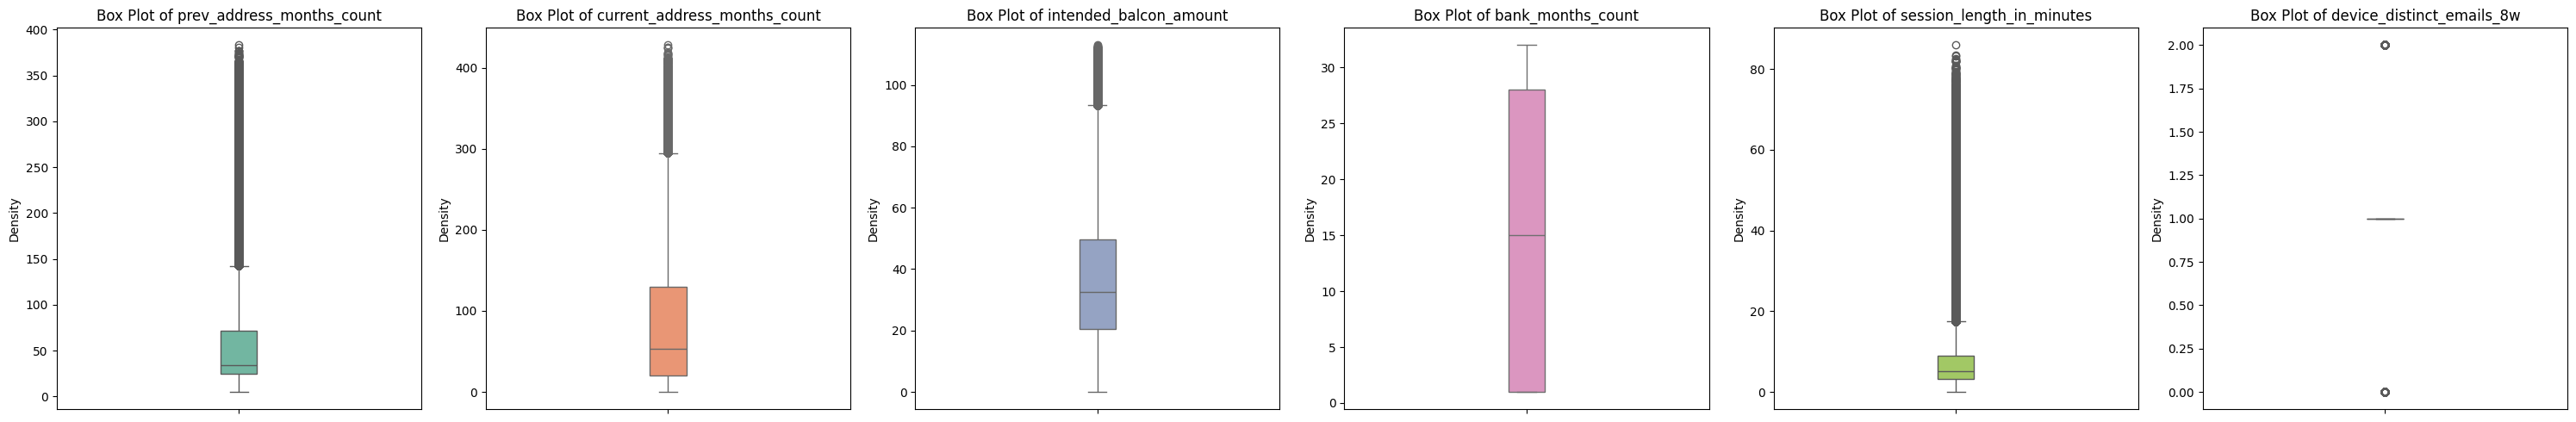

In [61]:
# Create box plots for multiple features
# Determine the number of features
num_features = len(df_missing.columns)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(num_features * 5, 5))

# Ensure axes is iterable
if num_features == 1:
    axes = [axes]

# Define a color palette
colors = sns.color_palette('Set2', num_features)

# Loop through each feature
for i, (ax, column) in enumerate(zip(axes, df_missing.columns)):
    # Plot the KDE plot
    #sns.kdeplot(data=df_missing[column], ax=ax, color=colors[i], fill=True, alpha=0.3)
    
    # Add the box plot on the same axes
    sns.boxplot(y=df_missing[column], ax=ax, width=0.1, color=colors[i])

    ax.set_title(f'Box Plot of {column}')
    ax.set_xlabel('')
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

#### Insights

- Scaling, encoding: 
    - **device_distinct_emails_8w**: One-Hot Encoding (nominal categorical)
    - **session_length_in_minutes**: Robust Scaling (outliers)
    - **intended_balcon_amount**: consider dropping (High percentage of missing in a feature)
    - **current_address_months_count**: Robust Scaling (outliers)
    - **prev_address_months_count**: consider dropping (High percentage of missing in a feature)
- Filling NA:
    - **device_distinct_emails_8w**: SimpleImputer(strategy='most_frequent')
    - **session_length_in_minutes**: SimpleImputer(strategy='median')
    - **intended_balcon_amount**: consider dropping (High percentage of missing in a feature)
    - **current_address_months_count**: SimpleImputer(strategy='median') (outliers)
    - **prev_address_months_count**: consider dropping (High percentage of missing in a feature)

#### 1.1.3 Dropping features 

In [62]:
#drop intended_balcon_amount and prev_address_months_count

df.drop(['prev_address_months_count', 'intended_balcon_amount', 'device_fraud_count'], axis=1, inplace=True)
df.shape

(1000000, 29)

## 2. Data Preprocessing

In [63]:
# Split your dataset BEFORE fitting any preprocessing to avoid data leakage
from sklearn.model_selection import train_test_split

X = df.drop(['fraud_bool'], axis=1)
y = df['fraud_bool']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [64]:
X_train.shape, X_test.shape


((800000, 28), (200000, 28))

In [65]:
# Define feature types

num_features = ['income', 'name_email_similarity', 'current_address_months_count', 'customer_age', 'days_since_request'
                    , 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 
                    'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit',  'session_length_in_minutes',
                    'device_distinct_emails_8w', 'month']


cat_features = ['payment_type', 'employment_status', 'housing_status',
                         'source', 'device_os']

binary_features = [
    'email_is_free',
    'phone_home_valid',
    'phone_mobile_valid',
    'has_other_cards',
    'foreign_request',
    'keep_alive_session',
]

print(f"Number of numerical features: {len(num_features)}")
print(f"Number of categorical features: {len(cat_features)}")       
print(f"Number of binary features: {len(binary_features)}")

Number of numerical features: 17
Number of categorical features: 5
Number of binary features: 6


### 2.1 Filling missing value using SimpletImputer

In [66]:
from sklearn.impute import SimpleImputer

In [67]:
# a. Impute Numerical Features
# Median imputation is preferred when the distribution is skewed
num_imputer = SimpleImputer(strategy="median")

# Fit the imputer on the training data
num_imputer.fit(X_train[num_features])

# Transform both training and test data
X_train_numeric = pd.DataFrame(
    num_imputer.transform(X_train[num_features]),
    columns=num_features,
    index=X_train.index
)

X_test_numeric = pd.DataFrame(
    num_imputer.transform(X_test[num_features]),
    columns=num_features,
    index=X_test.index
)


In [68]:
# b. Impute Categorical
# Initialize the imputer for categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the training data
categorical_imputer.fit(X_train[cat_features])

# Transform both training and test data
X_train_categorical = pd.DataFrame(
    categorical_imputer.transform(X_train[cat_features]),
    columns=cat_features,
    index=X_train.index
)

X_test_categorical = pd.DataFrame(
    categorical_imputer.transform(X_test[cat_features]),
    columns=cat_features,
    index=X_test.index
)


In [69]:
# c. Impute Binary Features

# Initialize the imputer for binary features
binary_imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the training data
binary_imputer.fit(X_train[binary_features])

# Transform both training and test data
X_train_bin = pd.DataFrame(
    binary_imputer.transform(X_train[binary_features]),
    columns=binary_features,
    index=X_train.index
)

X_test_bin = pd.DataFrame(
    binary_imputer.transform(X_test[binary_features]),
    columns=binary_features,
    index=X_test.index
)

In [70]:
# Combine numerical and categorical features and binary features
X_train_imputed = pd.concat([X_train_numeric, X_train_categorical, X_train_bin], axis=1)
X_test_imputed = pd.concat([X_test_numeric, X_test_categorical, X_test_bin], axis=1)

print("Imputed Training Data:")
X_train_imputed.head()

# print("\nImputed Test Data:")
# print(X_test_imputed.head())

Imputed Training Data:


,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,...,employment_status,housing_status,source,device_os,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,keep_alive_session
39111,0.7,0.229712,63.0,50.0,0.024720,1305.0,12764.326278,6418.672862,5998.527006,7.0,...,CA,BC,INTERNET,linux,1,0,1,1,0,0
822700,0.2,0.928428,24.0,70.0,0.014153,833.0,9717.635327,6342.913428,4814.609668,1.0,...,CC,BD,INTERNET,other,0,1,0,0,0,1
914415,0.1,0.658630,2.0,40.0,0.045801,237.0,2201.833206,2753.815567,3076.055489,14.0,...,CA,BC,INTERNET,other,1,1,1,0,0,1
581307,0.8,0.774858,122.0,30.0,0.005569,895.0,5377.254660,4551.599208,4223.827504,0.0,...,CA,BE,INTERNET,other,0,0,1,1,0,1
603136,0.9,0.993460,9.0,20.0,0.010832,4105.0,7428.775954,4872.930234,4250.760719,14.0,...,CB,BC,INTERNET,linux,1,1,1,1,0,0


In [71]:
X_train_imputed.isna().sum()

income                              0
name_email_similarity               0
current_address_months_count        0
customer_age                        0
days_since_request                  0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
credit_risk_score                   0
bank_months_count                   0
proposed_credit_limit               0
session_length_in_minutes           0
device_distinct_emails_8w           0
month                               0
payment_type                        0
employment_status                   0
housing_status                      0
source                              0
device_os                           0
email_is_free                       0
phone_home_valid                    0
phone_mobile_valid                  0
has_other_cards                     0
foreign_requ

- No more misssing value

### 2.2 Data Scalling and Encoding

In [72]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder

In [73]:
# a. Scale Numerical Features
# Initialize the scaler
scaler = RobustScaler()

# Fit the scaler on the training data
scaler.fit(X_train_imputed[num_features])

# Transform both training and test data
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_imputed[num_features]),
    columns=num_features,
    index=X_train_imputed.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_imputed[num_features]),
    columns=num_features,
    index=X_test_imputed.index
)

In [74]:
# b. Encode Categorical Features
# Initialize the encoder
encoder = OneHotEncoder(sparse=False)

# Fit the encoder on the training data
encoder.fit(X_train_imputed[cat_features])

# Transform both training and test data
X_train_encoded = pd.DataFrame(
    encoder.transform(X_train_imputed[cat_features]),
    columns=encoder.get_feature_names_out(cat_features),
    index=X_train_imputed.index
)

X_test_encoded = pd.DataFrame(
    encoder.transform(X_test_imputed[cat_features]),
    columns=encoder.get_feature_names_out(cat_features),
    index=X_test_imputed.index
)


d:\project\Credit_Fraud_endToEnd\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [75]:
X_train_encoded.shape, X_train_scaled.shape, X_train_bin.shape

((800000, 26), (800000, 17), (800000, 6))

In [76]:
# Combine scaled numerical and encoded categorical features
X_train_preprocessed = pd.concat([X_train_scaled, X_train_encoded, X_train_bin], axis=1)
X_test_preprocessed = pd.concat([X_test_scaled, X_test_encoded, X_test_bin], axis=1)

print("Preprocessed Training Data:")
X_train_preprocessed.describe()

Preprocessed Training Data:


,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,...,device_os_macintosh,device_os_other,device_os_windows,device_os_x11,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,keep_alive_session
count,800000.000000,8.000000e+05,800000.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,8.000000e+05,8.000000e+05,800000.000000,...,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,-0.074280,2.798224e-03,0.307664,0.185004,5.273293e+01,0.295015,0.081889,8.995807e-03,-4.718713e-02,7.304238,...,0.053825,0.342586,0.263595,0.007250,0.530068,0.417243,0.889406,0.222726,0.025313,0.577194
std,0.580686,5.451920e-01,0.802124,0.601413,2.810498e+02,0.957365,0.708788,6.849424e-01,7.541731e-01,19.145093,...,0.225672,0.474575,0.440582,0.084838,0.499095,0.493104,0.313629,0.416076,0.157073,0.494005
min,-1.000000,-9.284185e-01,-0.481818,-1.000000,-7.926162e-01,-1.201905,-1.292183,-1.588173e+00,-1.712184e+00,-0.375000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.600000,-5.034958e-01,-0.300000,-0.500000,-4.172591e-01,-0.351429,-0.443109,-5.359755e-01,-5.291511e-01,-0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,5.234240e-17,0.000000,0.000000,-4.533352e-17,0.000000,0.000000,2.105272e-16,-3.729348e-16,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.400000,4.965042e-01,0.700000,0.500000,5.827409e-01,0.648571,0.556891,4.640245e-01,4.708489e-01,0.666667,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,0.600000,9.574090e-01,3.409091,3.000000,4.099835e+03,5.178095,2.684560,2.201853e+00,1.706794e+00,99.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- We have finished scalling and encoding the data

### 2.3 Features selection

#### 2.3.1 Features selection using chi2 and f test

In [77]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
# For demonstration, let's train a simple classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [78]:
# feature numerical selection
def select_features_f_classif(X_train, y_train, X_test):
	fs = SelectKBest(score_func=f_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# categorical feature selection
def select_features_chi2(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [79]:
# a. f_classif for Numerical
# Initialize SelectKBest for numerical features

#Prepare numerical features
X_train_num = X_train_preprocessed[num_features]
X_test_num = X_test_preprocessed[num_features]

X_train_num_fs, X_test_num_fs, num_fs = select_features_f_classif(X_train_num, y_train, X_test_num)

import pandas as pd

# Create a DataFrame with feature names, F scores, and p-values
feature_scores_df = pd.DataFrame({
    'Feature': num_fs.feature_names_in_,
    'F_Score': num_fs.scores_,
    'p_value': num_fs.pvalues_
})

# Sort the DataFrame by F_Score in descending order
feature_scores_sorted = feature_scores_df.sort_values(by='F_Score', ascending=False).reset_index(drop=True)

# Step 3: Print the sorted DataFrame
print("Features sorted by F Score (Descending):\n")
print(feature_scores_sorted)

Features sorted by F Score (Descending):

                             Feature      F_Score        p_value
0                  credit_risk_score  3999.427892   0.000000e+00
1              proposed_credit_limit  3710.984979   0.000000e+00
2                       customer_age  3218.444228   0.000000e+00
3                             income  1638.735992   0.000000e+00
4   date_of_birth_distinct_emails_4w  1515.647607   0.000000e+00
5              name_email_similarity  1067.344207  5.906042e-234
6          device_distinct_emails_8w  1004.172931  3.049533e-220
7       current_address_months_count   860.511963  4.752446e-189
8                  bank_months_count   244.564258   4.052413e-55
9                        velocity_6h   235.337868   4.157938e-53
10                             month   142.034920   9.616608e-33
11                       velocity_4w   114.158516   1.207964e-26
12              bank_branch_count_8w   111.736530   4.097173e-26
13                      velocity_24h    97.92206

- Using alpha = 0.05, we reject non-significant feature "days_since_request" with p-value (0.3639442)

In [80]:
# b. chi2 for Categorical
# Initialize SelectKBest for numerical features

#Prepare categorical features
X_train_cat = X_train_preprocessed.drop(columns= num_features + binary_features, axis=1)
X_test_cat = X_test_preprocessed.drop(columns= num_features + binary_features, axis=1)

X_train_cat_fs, X_test_cat_fs, cat_fs = select_features_chi2(X_train_cat, y_train, X_test_cat)

import pandas as pd

# Create a DataFrame with feature names, F scores, and p-values
cat_feature_scores_df = pd.DataFrame({
    'Feature': cat_fs.feature_names_in_,
    'Chi-Squared_Score': cat_fs.scores_,
    'p_value': cat_fs.pvalues_
})

# Sort the DataFrame by F_Score in descending order
cat_feature_scores_sorted = cat_feature_scores_df.sort_values(by='Chi-Squared_Score', ascending=False).reset_index(drop=True)

# Step 3: Print the sorted DataFrame
print("Categorical features sorted by Chi-Squared (Descending):\n")
print(cat_feature_scores_sorted)

Categorical features sorted by Chi-Squared (Descending):

                 Feature  Chi-Squared_Score        p_value
0      housing_status_BA        8790.840406   0.000000e+00
1      device_os_windows        3542.113893   0.000000e+00
2        device_os_linux         833.674705  2.574900e-183
3      housing_status_BE         700.334706  2.528833e-154
4        device_os_other         675.145343  7.597174e-149
5      housing_status_BC         673.626752  1.625165e-148
6        payment_type_AA         619.972054  7.582900e-137
7        payment_type_AC         585.923780  1.929964e-129
8   employment_status_CC         529.935285  2.917614e-117
9      housing_status_BB         489.585282  1.754083e-108
10  employment_status_CF         256.971092   7.848026e-58
11  employment_status_CB         167.031160   3.293241e-38
12  employment_status_CE         125.877037   3.271384e-29
13  employment_status_CD          95.650790   1.370450e-22
14  employment_status_CA          66.205556   4.062659e-1

Standard Thresholds:

- p-value < 0.05: The feature is statistically significant and should be kept.

- p-value ≥ 0.05: The feature is not statistically significant and can be dropped.

- Features to Keep: All features with p-values less than 0.05. In your case, this includes features from index 0 to 24.

- Features to Drop: All features with p-values greater than or equal to 0.05. This includes features from index 25 to 31.

#### 2.3.2 Use Mutual Information for numerical features

In [81]:
# a. Mutual information 
from sklearn.feature_selection import mutual_info_classif
#Prepare numerical features

mutual_info = mutual_info_classif(X_train_preprocessed, y_train)
mutual_info

array([2.66363053e-02, 1.01162685e-03, 2.27009087e-03, 2.21901893e-02,
       4.54958815e-04, 0.00000000e+00, 2.83004920e-04, 4.00364442e-04,
       3.61011304e-04, 1.02160718e-03, 7.27180003e-03, 2.99600712e-03,
       1.54233619e-02, 1.74407125e-02, 1.55915690e-04, 1.23926490e-03,
       1.57193916e-02, 3.55646169e-02, 6.80704526e-02, 3.30775986e-02,
       7.49745440e-03, 0.00000000e+00, 1.55309081e-01, 1.00449748e-02,
       1.62422073e-03, 7.63401221e-04, 8.12030821e-04, 2.39154380e-03,
       0.00000000e+00, 1.90441713e-02, 3.65272502e-02, 6.96787820e-02,
       7.01059391e-04, 1.57284511e-02, 1.26059578e-04, 3.10177286e-05,
       1.67639504e-01, 2.75043689e-04, 5.70166505e-02, 3.06856348e-03,
       6.03656449e-02, 3.74626694e-02, 1.00347415e-05, 1.22130109e-01,
       8.59291031e-02, 1.41887885e-01, 2.72238433e-02, 7.76376050e-04,
       1.34872282e-01])

In [82]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_preprocessed.columns
mutual_info.sort_values(ascending=False)

source_INTERNET                     0.167640
employment_status_CA                0.155309
phone_mobile_valid                  0.141888
keep_alive_session                  0.134872
email_is_free                       0.122130
phone_home_valid                    0.085929
housing_status_BC                   0.069679
payment_type_AB                     0.068070
device_os_other                     0.060366
device_os_linux                     0.057017
device_os_windows                   0.037463
housing_status_BB                   0.036527
payment_type_AA                     0.035565
payment_type_AC                     0.033078
has_other_cards                     0.027224
income                              0.026636
customer_age                        0.022190
housing_status_BA                   0.019044
proposed_credit_limit               0.017441
housing_status_BE                   0.015728
month                               0.015719
bank_months_count                   0.015423
employment

<Axes: >

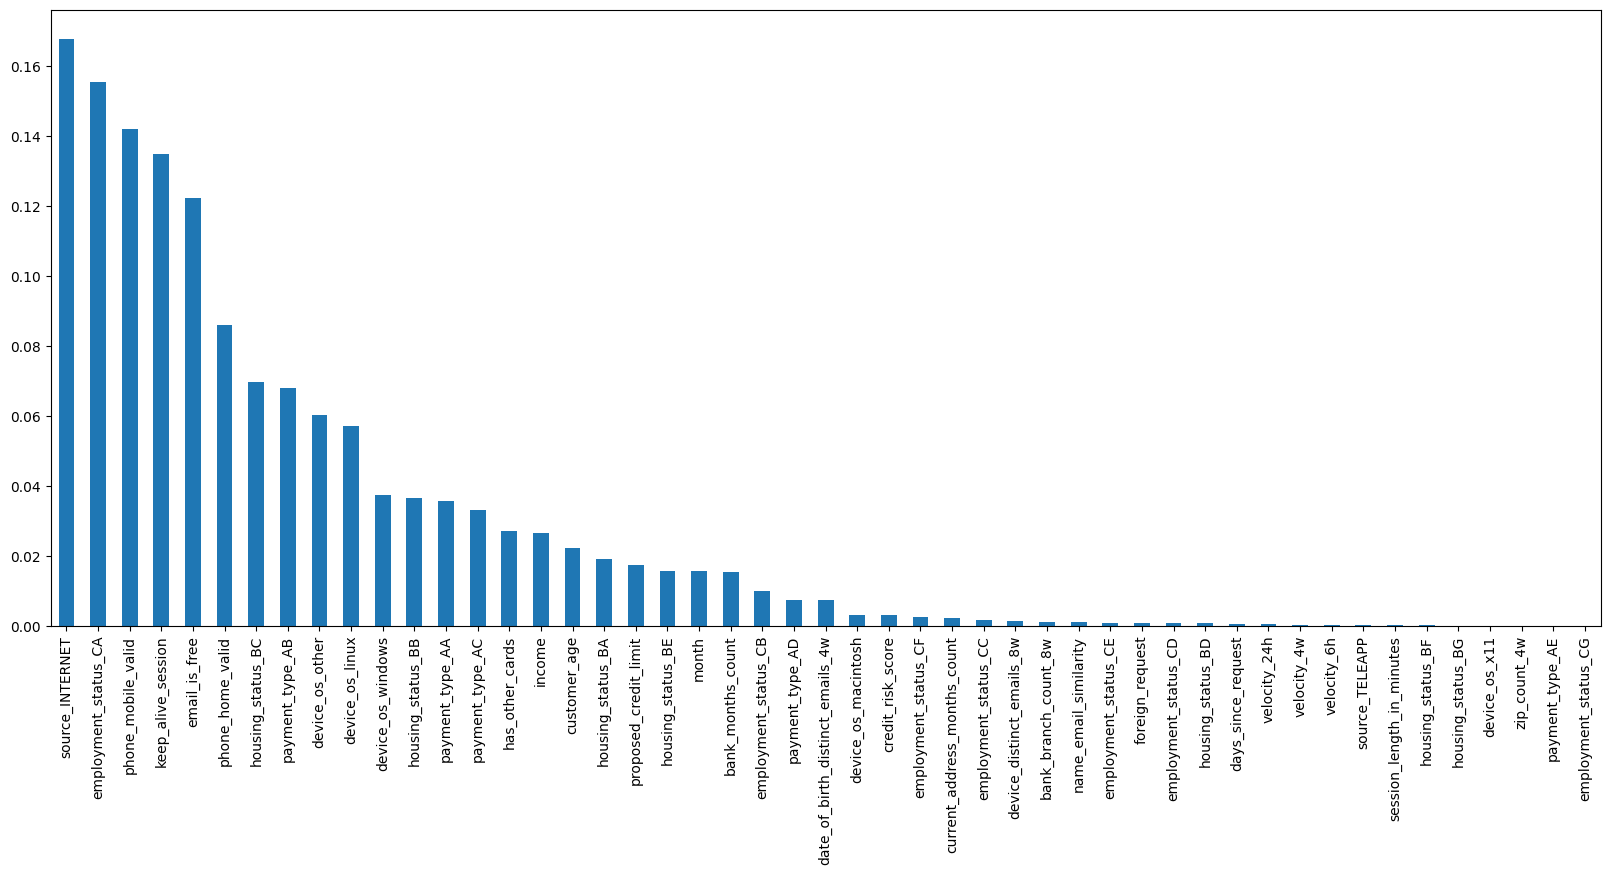

In [83]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

#### Insight
- For now, I will choose top 30 categorical features.

In [86]:
feature_to_drop = mutual_info.sort_values(ascending=False)[31:].index.tolist()
print(feature_to_drop)
print(len(feature_to_drop))

['bank_branch_count_8w', 'name_email_similarity', 'employment_status_CE', 'foreign_request', 'employment_status_CD', 'housing_status_BD', 'days_since_request', 'velocity_24h', 'velocity_4w', 'velocity_6h', 'source_TELEAPP', 'session_length_in_minutes', 'housing_status_BF', 'housing_status_BG', 'device_os_x11', 'zip_count_4w', 'payment_type_AE', 'employment_status_CG']
18


In [87]:
# Drop 7 categorical features and 1 numerical feature

df_train_drop = X_train_preprocessed.drop(columns=feature_to_drop, axis=1, inplace=True)
df_test_drop = X_test_preprocessed.drop(columns=feature_to_drop, axis=1, inplace=True)
X_train_preprocessed.shape, X_test_preprocessed.shape

((800000, 31), (200000, 31))

source: https://guhanesvar.medium.com/feature-selection-based-on-mutual-information-gain-for-classification-and-regression-d0f86ea5262a

## 3. Model Trainning

#### We will perform sampling technique such as NearMiss or SMOTE to address class imbalance. 

In [91]:
# Imbalanced-learn for NearMiss and Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

#Grid SearchCV
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Scoring
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

#Model
from lightgbm import LGBMClassifier as lgb
from sklearn.linear_model import LogisticRegression


#### Sampling

#### Let's try to compare the performance of undersampling and oversampling with our baseline model logistic regression

In [108]:
near_miss_obj = NearMiss()
smote_obj = SMOTE()
#smoteen_obj = SMOTEENN()

X_train_over, y_train_res_over = smote_obj.fit_resample(X_train_preprocessed, y_train.ravel())
X_train_under, y_train_res_under = near_miss_obj.fit_resample(X_train_preprocessed, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res_over.shape))
print('After UnderSampling, the shape of train_X: {}'.format(X_train_under.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_res_under.shape))

After OverSampling, the shape of train_X: (1582354, 31)
After OverSampling, the shape of train_y: (1582354,) 

After UnderSampling, the shape of train_X: (17646, 31)
After UnderSampling, the shape of train_y: (17646,) 



In [111]:
logis_smote_model = LogisticRegression(max_iter = 1000000, solver="saga")
logis_smote_model.fit(X_train_over, y_train_res_over)

logis_nearmiss_model = logis_model = LogisticRegression(max_iter = 1000000)
logis_nearmiss_model.fit(X_train_under, y_train_res_under)

LogisticRegression(max_iter=1000000)

In [112]:
y_pred_logis_smote = logis_smote_model.predict(X_test_preprocessed)
smote_report = classification_report(y_test, y_pred_logis_smote)
print(f"Classification Report for Logistic Regression with Oversampling:\n{smote_report}")

y_pred_logis_nearmiss = logis_nearmiss_model.predict(X_test_preprocessed)
nearmiss_report = classification_report(y_test, y_pred_logis_nearmiss)
print(f"Classification Report for Logistic Regression with Undersampling:\n{nearmiss_report}")



Classification Report for Logistic Regression with Oversampling:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    197794
           1       0.04      0.73      0.08      2206

    accuracy                           0.82    200000
   macro avg       0.52      0.78      0.49    200000
weighted avg       0.99      0.82      0.89    200000

Classification Report for Logistic Regression with Undersampling:
              precision    recall  f1-score   support

           0       0.98      0.14      0.24    197794
           1       0.01      0.79      0.02      2206

    accuracy                           0.15    200000
   macro avg       0.50      0.46      0.13    200000
weighted avg       0.97      0.15      0.24    200000



#### Insights

**Oversampling**

- Oversampling performs **better overall**, with **higher accuracy** and a reasonable trade-off between recall and precision for the minority class.

**Undersampling**
- Undersampling struggles with majority class recall and precision while slightly improving minority class recall.


=> We will choose oversampling as our main sampling method

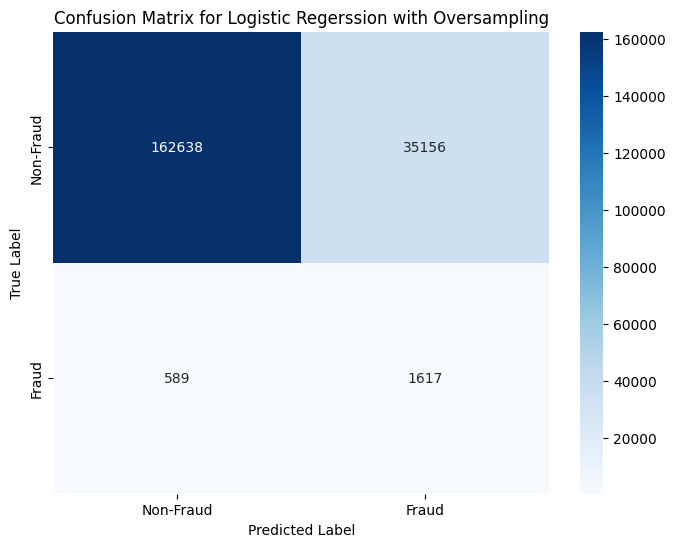

In [114]:
cm_losgitic = confusion_matrix(y_test, y_pred_logis_smote)
# 5. Visualize the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_losgitic, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regerssion with Oversampling')
plt.show()  


In [105]:
#predict probability
y_pred_prob = logis_model.predict_proba(X_test_preprocessed)
# retrieve just the probabilities for the positive class
pos_probs = y_pred_prob[:, 1]


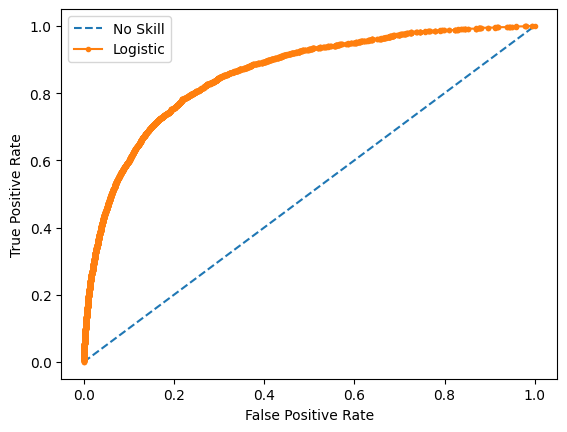

Logistic ROC AUC 0.857


In [115]:
from matplotlib import pyplot
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
# calculate roc auc
roc_auc = roc_auc_score(y_test, pos_probs)
print('Logistic ROC AUC %.3f' % roc_auc)

An ROC curve (or receiver operating characteristic curve) is a plot that summarizes the performance of a binary classification model on the positive class.

The x-axis indicates the False Positive Rate and the y-axis indicates the True Positive Rate.

source: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/

#### Let's try to fit different models and evaluate their performance

- For the sake of efficiency, I will try different models and chose the best model for hyperparameter tunning

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score
from imblearn.over_sampling import SMOTE
import sys
import os

#### Scoring Metric: ROC AUC

- Why: To balance the trade off between TPR and FPR. We want to caught fraud application but at the same time we don't want to reject many good applications

In [127]:
# Eval_models function from utils.py

def eval_models(X_train, y_train, X_test, y_test, models):
    report = {}
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model_name = list(models.keys())[i]
        
        # Define pipeline
        final_pipeline = ImbPipeline([
            ('resampler', SMOTE()),
            ('classifier', model)
        ])
        # Choose scoring metric
        scorer = make_scorer(roc_auc_score, needs_proba=True)
        
        # Cross-validation
        skf = StratifiedKFold(n_splits=3, shuffle= True, random_state=42 )
        cv_scores = cross_val_score(final_pipeline, X_train, y_train, cv=skf, scoring=scorer, n_jobs=-1)
        
        #fit on full training set and test performance
        final_pipeline.fit(X_train, y_train)
        test_score = roc_auc_score(y_test, final_pipeline.predict_proba(X_test)[:, 1]) 
        
        # Save results
        report[model_name] = {
            'cv_mean': np.mean(cv_scores),
            'cv_std': np.std(cv_scores),
            'test_score': test_score
        }
        print(f"{model_name} - CV Mean: {np.mean(cv_scores):.4f}, Test Score: {test_score:.4f}")
    return report


#### Remark
**Resampling in Each Fold:**

- Currently, SMOTE is applied in the pipeline, which is correct, but ensure that SMOTE is applied within each fold of cross-validation to avoid data leakage.

source:https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

In [128]:
models = {
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "LightGBM": lgb(),
    "LogisticRegression": LogisticRegression(max_iter= 1000000)
}

report = eval_models(X_train_preprocessed, y_train, X_test_preprocessed, y_test, models)


RandomForestClassifier - CV Mean: 0.8358, Test Score: 0.8448
LightGBM - CV Mean: 0.8676, Test Score: 0.8711
LogisticRegression - CV Mean: 0.8532, Test Score: 0.8568


#### LighGBM has the highest Test Score (0.8711), let's print out model metric and try to tune the model for better result!

In [140]:
# Fit model with LightGBM
lgb_model = lgb()
lgb_model.fit(X_train_over, y_train_res_over)

LGBMClassifier()

In [154]:
#Predict
y_pred_lgb = lgb_model.predict(X_test_preprocessed)
lgb_report = classification_report(y_test, y_pred_lgb)
print(f"Classification Report for LightGBM with Oversampling:\n{lgb_report}")

Classification Report for LightGBM with Oversampling:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197794
           1       0.29      0.08      0.13      2206

    accuracy                           0.99    200000
   macro avg       0.64      0.54      0.56    200000
weighted avg       0.98      0.99      0.98    200000



#### Insights
- Recall score is very low, this is probably due to threshold at 0.5 is not optimal for LIGHTGBM

#### Let's plot precision-recall curve for Positive class

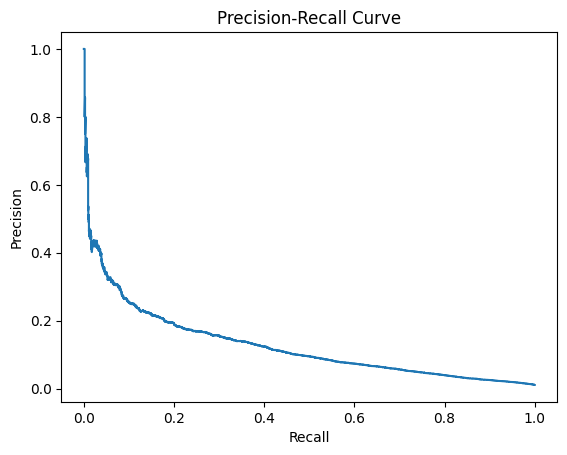

In [143]:
from sklearn.metrics import precision_recall_curve

y_pred_probs = lgb_model.predict_proba(X_test_preprocessed)[:, 1]  # Predicted probabilities for the positive class
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_probs)

# Plot Precision-Recall curve
import matplotlib.pyplot as plt
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [162]:
optimal_threshold = 0.04  # Example threshold based on the curve
y_pred_adjusted = (y_pred_probs >= optimal_threshold).astype(int)

adjusted_report = classification_report(y_test, y_pred_adjusted)
print(f"Classification Report for LightGBM with Oversampling at 0.04 threshold:\n{adjusted_report}")


Classification Report for LightGBM with Oversampling at 0.04 threshold:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    197794
           1       0.04      0.77      0.08      2206

    accuracy                           0.82    200000
   macro avg       0.52      0.79      0.49    200000
weighted avg       0.99      0.82      0.89    200000



#### Insights
1. Improved Fraud Detection (Recall):

- The recall for Class 1 (fraud cases) **increased to 77%**, meaning the model now detects most fraud cases. This is a significant improvement over the earlier recall (likely **near 8%** or so when using the default threshold of 0.5).

2. Precision Tradeoff:
- Precision for fraud cases dropped to 4%, indicating that many non-fraud cases are misclassified as fraud (false positives). This is the expected tradeoff when adjusting the threshold to prioritize recall in highly imbalanced datasets.

3. Accuracy
- Achieve good overall accuracy (0.82).

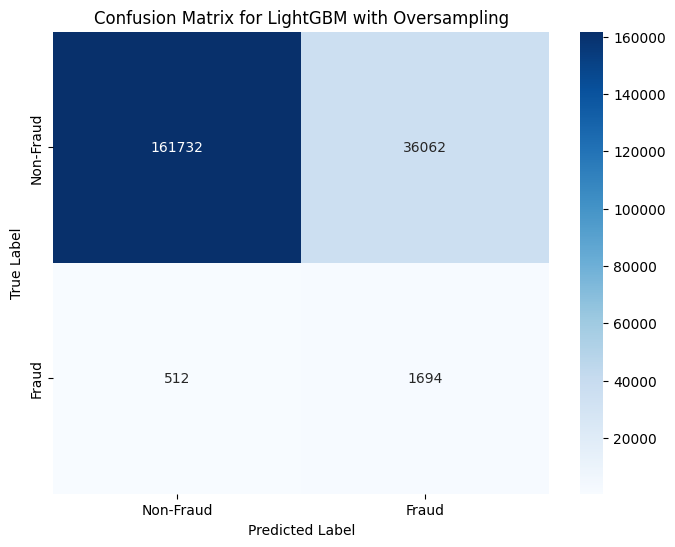

In [161]:
cm_lgbm = confusion_matrix(y_test, y_pred_adjusted)
# 5. Visualize the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for LightGBM with Oversampling')
plt.show()  